# Les énumérations, structures et classes en C#

## Énumérations

Une énumération (`enum`) est une manière efficace de créer un groupe de noms symboliques et les associer à une valeur numérique (`int` par défaut).

Une énumération regroupe habituellement des noms symboliques similaires ou représente une idée similaire.

**Exemple** : une énumération de race de chiens

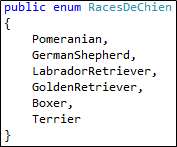

Le type numérique d’une énumération peut être changé à d’autre type numérique primaire tel que `byte`, `short` et `long`

Par défaut, la valeur numérique incrémente de un par nom et commence à `0`

La valeur initiale (`0` par défaut) peut être changée, ce qui va automatiquement décaler la valeur des noms suivants

In [5]:
public enum RacesDeChien
    : byte
{
    Pomeranian = 10,    // 10
    GermanShepherd,     // 11
    LabradorRetriever,  // 12
    GoldenRetriever,    // 13
    Boxer,              // 14
    Terrier             // 15
}

var race = (RacesDeChien)13;
Console.WriteLine($"{race.ToString()} = {(int)race}");

GoldenRetriever = 13


### La classe statique `System.Enum`

La classe `System.Enum` offre plusieurs méthodes statiques permettant la récupération d’informations utile d’une énumération particulière.

La méthode `Enum.GetValues` retourne un tableau avec toutes les valeurs possibles d’un enum particulier (le « `Type` » du `enum` doit être passé en paramètre).

In [4]:
public enum RacesDeChien
    : byte
{
    Pomeranian = 10,    // 10
    GermanShepherd,     // 11
    LabradorRetriever,  // 12
    GoldenRetriever,    // 13
    Boxer,              // 14
    Terrier             // 15
}

var valeurs = Enum.GetValues(typeof(RacesDeChien));

foreach(RacesDeChien race in valeurs)
{
    Console.WriteLine($"{race.ToString()} = {(int)race}");
}

Pomeranian = 10
GermanShepherd = 11
LabradorRetriever = 12
GoldenRetriever = 13
Boxer = 14
Terrier = 15


## Structures

Une structure (`struct`) est une manière de regrouper plusieurs champs et méthodes membres dans un type ou objet défini par le programmeur.

Une structure est souvent utilisée pour représenter des entités mathématiques ou géométriques.

In [12]:
public struct Point
{
    public int X;
    public int Y;

    public void IncrementeX()
    {
        X++;
    }
    
    public void DecrementeX()
    {
        X--;
    }
    
    public void IncrementeY()
    {
        Y++;
    }
    
    public void DecrementeY()
    {
        Y--;
    }
}

Point p;
p.X = 25;
p.Y = -5;

p.IncrementeX();
p.DecrementeY();

Console.WriteLine($"X: {p.X} \t Y: {p.Y}");

X: 26 	 Y: -6


Une structure devrait avoir des constructeurs pour simplifier son initialisation.

In [13]:
public struct Point
{
    public int X;
    public int Y;

    // Constructeur
    public Point(int x, int y)
    {
        this.X = x;
        this.Y = y;
    }

    public void IncrementeX()
    {
        X++;
    }
    
    public void DecrementeX()
    {
        X--;
    }
    
    public void IncrementeY()
    {
        Y++;
    }
    
    public void DecrementeY()
    {
        Y--;
    }
}

Point p = new Point(25, -5);
//Point p = new Point(x: 25, y: -5);
//p.X = 25;
//p.Y = -5;

p.IncrementeX();
p.DecrementeY();

Console.WriteLine($"X: {p.X} \t Y: {p.Y}");

X: 26 	 Y: -6


### Les structures immuables

In [14]:
public readonly struct PointReadOnly
{
   public int X { get; }
   public int Y { get; }

   public PointReadOnly(int x, int y)
   {
       this.X = x;
       this.Y = y;
   }

   public PointReadOnly IncrementeX()
   {
       return new PointReadOnly(this.X + 1, this.Y);
   }

   public PointReadOnly DecrementeX()
   {
       return new PointReadOnly(this.X - 1, this.Y);
   }

   public PointReadOnly IncrementeY()
   {
       return new PointReadOnly(this.X, this.Y + 1);
   }

   public PointReadOnly DecrementeY()
   {
       return new PointReadOnly(this.X, this.Y - 1);
   }
}

- https://docs.microsoft.com/en-us/dotnet/standard/design-guidelines/choosing-between-class-and-struct
- https://daveabrock.com/2020/07/06/c-sharp-9-deep-dive-records

## Classes

Tout comme les structures, une classe (`class`) est une manière de regrouper plusieurs champs et méthodes membres dans un type ou objet défini par le programmeur.

La combinaison des champs membres représente l’état de l’objet.

L’initialisation de la classe (création d’un « `objet` » ou d’une instance de la classe) doit être faite à l’aide d’un constructeur.

- Une classe ne peut pas être déclarée sans « `new` » comme une structure.
- Un constructeur par défaut existe automatiquement pour chaque classe si aucun constructeur n’a été explicitement défini.

In [30]:
public class Voiture
{
    public string marque;
    public string model;
    public int annee;
    public int vitesse;

    public void ChangeVitesse(int vitesse)
    {
        this.vitesse = vitesse;
    }
    
    public void IncrementeVitesse()
    {
        vitesse++;
    }
    
    public void DecrementeVitesse()
    {
        vitesse--;
    }

    public void AfficheInformation()
    {
        Console.WriteLine($"{annee} {marque} {model}: {vitesse} km/h");
    }
}

var v1 = new Voiture();
Console.WriteLine("Voiture 1:");
v1.AfficheInformation();
Console.WriteLine("");

var v2 = new Voiture();
v2.annee = 2019;
v2.marque = "Tesla";
v2.model = "Model X";
v2.vitesse = 84;
Console.WriteLine("Voiture 2:");
v2.AfficheInformation();


(53,14): error CS0122: 'Voiture.Voiture()' is inaccessible due to its protection level

(58,14): error CS0122: 'Voiture.Voiture()' is inaccessible due to its protection level



Cell not executed: compilation error

### Constructeurs

Afin d’initialiser une classe, tout en spécifiant l’état de l’objet, le programmeur doit appeler un constructeur prédéfini permettant la personnalisation des champs membres.

- L’appel d’un constructeur est fait à l’aide du mot clé « new », suivi du nom de la classe et des valeurs des paramètres.

- La définition d’un constructeur est très similaire à une méthode sauf qu’il n’y a aucun type de retour.

Chaque constructeur doit avoir une signature unique.

Un constructeur est constitué de :
- Modificateurs optionnels (`private`, `public`, `static`, `internal`, etc.).
- Nom de la classe (Voiture, Chien, etc.).
- Paramètres optionnels (`string` model, `int` annee, etc.).
- L’appel optionnel d’un autre constructeur membre.

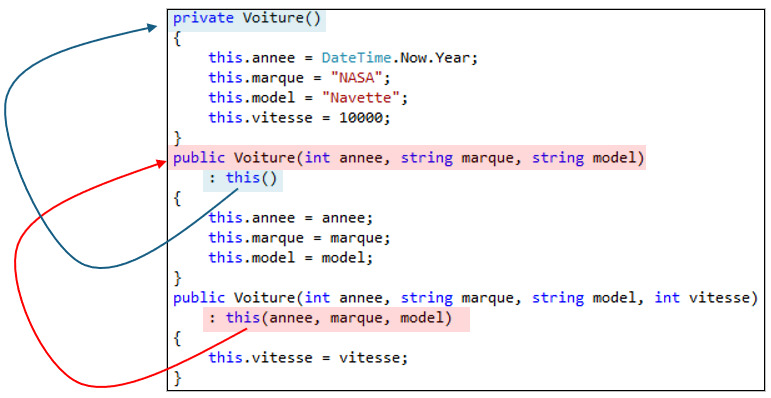

In [37]:
// Paramètres        #1    #2       #3
var v1 = new Voiture(2019, "Tesla", "Model X");
Console.WriteLine("Voiture 1:");
v1.AfficheInformation();
Console.WriteLine("");

// Paramètres        #1    #2       #3         #4
var v2 = new Voiture(2019, "Tesla", "Model X", 84);
Console.WriteLine("Voiture 2:");
v2.AfficheInformation();

public class Voiture
{
    public string marque;
    public string model;
    public int annee;
    public int vitesse;

    private Voiture()
    {
        this.annee = DateTime.Now.Year;
        this.marque = "NASA";
        this.model = "Navette";
        this.vitesse = 10000;
    }
    public Voiture(int annee, string marque, string model)
        : this()
    {
        this.annee = annee;
        this.marque = marque;
        this.model = model;
    }
    public Voiture(int annee, string marque, string model, int vitesse)
        : this(annee, marque, model)
    {
        this.vitesse = vitesse;
    }

    public void AfficheInformation()
    {
        Console.WriteLine("{0} {1} {2}: {3} km/h", annee, marque, model, vitesse);
    }
}

Voiture 1:
2019 Tesla Model X: 10000 km/h

Voiture 2:
2019 Tesla Model X: 84 km/h


### Destructeur

Une classe peut également avoir un « destructeur » (destructor).

- Le destructeur d’une classe est automatiquement appelé par le ramasse-miette (garbage collector) lorsqu’il n’y a plus de références à l’instance de la classe.

Un destructeur est constitué de :

- Un tilde (`~`) identifiant un destructeur.
- Le nom de la classe (Voiture, Chien, etc.).

In [49]:
public class Voiture
{
    public int vitesse;

    ~Voiture()
    {
        this.vitesse = 0;
        Console.WriteLine("Fini!");
    }
}

var v1 = new Voiture();
v1.vitesse = 100;
    
v1 = null;
    
GC.Collect();

### Mot clé « `this` »

Dans une méthode membre d’une classe ou structure, il est possible d’avoir un conflit de nom entre les champs membres et les paramètres de la méthode.

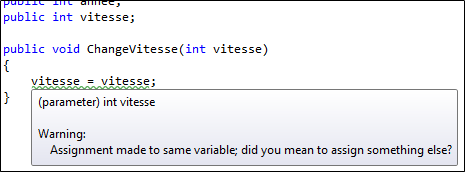

---
```cs
public class Voiture
{
    public int vitesse;

    public void ChangeVitesse(int vitesse)
    {
        vitesse = vitesse;
    }
}
```
---

Pour régler ce conflit, il suffit d’utiliser le mot clé « `this` » pour signifier que le champ membre devrait être utilisé au lieu.

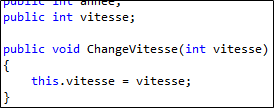

---
```cs
public class Voiture
{
    public int vitesse;

    public void ChangeVitesse(int vitesse)
    {
        this.vitesse = vitesse;
    }
}
```
---

L’utilisation de `this` peut être utilisée pour accéder ou appeler tous champs/méthodes/propriétés membres de l’objet.

On peut également invoquer IntelliSense pour afficher les membres d’une classe ou structure en tapant `this` suivi d’un point à l’intérieur d’une méthode membre.

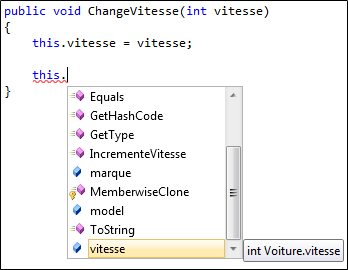

## Records

